<div class = "alert alert-warning" style= "color:black">
    <h2>Activity 5 (Stretch) : Understanding the role of pre-processing</h2>
    This is an additional activity for those of you who have made rapid progress.
</div>
<div class = "alert alert-warning" style= "color:black">
    <h3> Activity 5.1: Investigate the effect of differently scaled data</h3>
 <b>First</b> we will investigate what could happen if your measurements are in different units,  so one feature has values spanning a bigger range. <ul>
        <li> Make a copy of the iris data and convert the second  feature from cm to mm, <br> 
        You can create the version of the data using code like: <code>  irisXscaled = copy.deepcopy(irisX)</code><br>
        Then multiply the values in one column by ten like: <code> irisXscaled [:, 1:2] *=10 </code>
    </li>
   <li> Rerun kMeans on the new data (for your preferred number of clusters) and visualisation to see what difference it makes <br>
       You will need to  select some of the columns and pass them into your graphing code in the same way you did for the irisX data.</li>
    </ul>
</div>

In [1]:
# First, let's import necessary libraries and load the Iris dataset
import copy
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
irisX = iris.data  # Features
iris_target = iris.target  # True labels (not used for clustering, but useful for evaluation)

# Run K-means on the original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(irisX)
labels_original = kmeans_original.labels_

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Original data (first 3 rows):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Scaled data (first 3 rows):
[[ 5.1 35.   1.4  0.2]
 [ 4.9 30.   1.4  0.2]
 [ 4.7 32.   1.3  0.2]]


c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


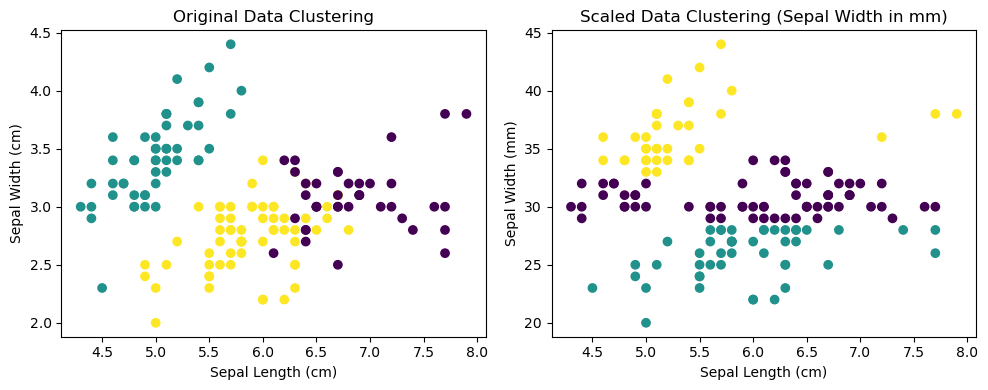

In [4]:
import copy
import copy
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
irisX = iris.data  # Features
iris_target = iris.target  # True labels (not used for clustering, but useful for evaluation)
# 1. put your code to change the data here (you could print the first few rows of data to see the effect of scaling)
irisXscaled = copy.deepcopy(irisX)
irisXscaled[:, 1:2] *= 10  # Multiply the second column by 10

# Print the first few rows to see the effect
print("Original data (first 3 rows):")
print(irisX[:3])
print("\nScaled data (first 3 rows):")
print(irisXscaled[:3])

# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXscaled in three places
kmeans_scaled = KMeans(n_clusters=3, random_state=42)  # Create KMeans object
kmeans_scaled.fit(irisXscaled)  # Fit on scaled data
labels_scaled = kmeans_scaled.labels_  # Get cluster labels
centers_scaled = kmeans_scaled.cluster_centers_  # Get cluster centers



# 3. then put your visualisation code here - but select x and y from irisXscaled instead of irisX
plt.figure(figsize=(10, 4))

# First, let's run clustering on original data for comparison
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(irisX)
labels_original = kmeans_original.labels_

# Plot for original data
plt.subplot(1, 2, 1)
plt.scatter(irisX[:, 0], irisX[:, 1], c=labels_original, cmap='viridis')
plt.title('Original Data Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Plot for scaled data
plt.subplot(1, 2, 2)
plt.scatter(irisXscaled[:, 0], irisXscaled[:, 1], c=labels_scaled, cmap='viridis')
plt.title('Scaled Data Clustering (Sepal Width in mm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (mm)')

plt.tight_layout()
plt.show()

<div class = "alert alert-warning" style= "color:black">
<h3> Activity 5.2: Using preprocessing so all the features have equal importance in kMeans distance calculations. </h3> 
Read the explanation below then: <ol>
    <li> <b>Add</b> the following lines to your code to get the preprocessed data.<br>
     <code>  scaler = sklearn.preprocessing.MinMaxScaler()
  scaler.fit(irisX)
  irisXnormalised = scaler.transform(irisX)</code>
    </li>
    <li> <b>Rerun </b> the clustering then visualisation for this normalised data and observe the difference.
    </ol>
  </div>

 ### Explanation
 As well as classes for different types of models, sklearn provides many preprocessing classes.  
Like models these implement a 'fit()' method,  but instead of `predict()' they have a 'transform()' method. 

A common way to make each feature equally important is to transform each one so that its values lie between 0 and 1.   
Assuming as usual  we store our set of examples as rows in an array X, with a  column for each features.  
For each individual feature j (column in X) it: 
- finds the highest  and lowest  values in column j of X
- uses these to calculate  the *range* of values in the column range(X[,j]) = max(X[,j] - min(X[,j])  
- subtracts the min(X[,j]) from each value so that they now all start from 0 and the highest value is now max(X[,j] - min(X[,j])
- divide each value by the range(X[,j]) so the upper value  is now 1

If you're feeling confident about numpy arrays and data slicing you could try implementing this your self using a loop over each column (X.shape[1]) and doing slicing making calls to numpy's min(), max() functions.  
There's some clues here:  https://stackoverflow.com/questions/12701659/finding-range-of-a-numpy-array-elements

Original data (first 3 rows):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Normalized data (first 3 rows):
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]]


c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


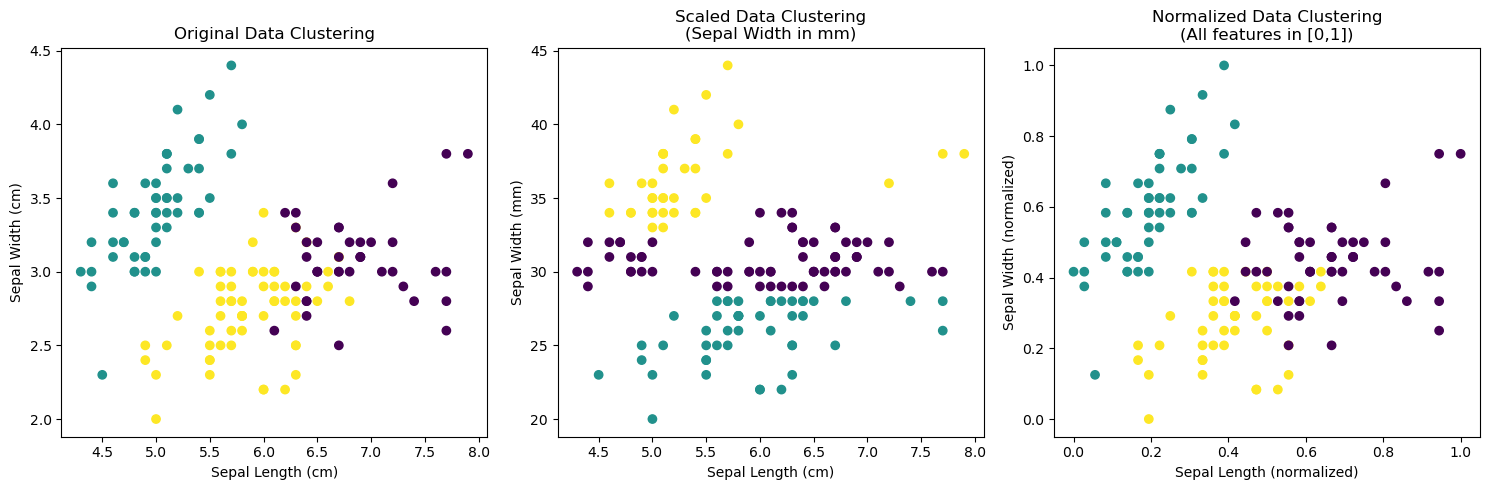

In [5]:
import copy
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
irisX = iris.data  # Features

# 1. put your code to change the data here (you could print the first few rows of data to see the effect of normalising)

# 1. Normalize the data using MinMaxScaler as specified in the instructions
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(irisX)
irisXnormalised = scaler.transform(irisX)

# Print the first few rows to see the effect of normalizing
print("Original data (first 3 rows):")
print(irisX[:3])
print("\nNormalized data (first 3 rows):")
print(irisXnormalised[:3])

# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXnormalised in two plces
kmeans_normalised = KMeans(n_clusters=3, random_state=42)  # Create KMeans object
kmeans_normalised.fit(irisXnormalised)  # Fit on normalized data
labels_normalised = kmeans_normalised.labels_  # Get cluster labels
centers_normalised = kmeans_normalised.cluster_centers_  # Get cluster centers

# 3. then put your visualisation code here - but select x and y from irisXnormalised instead of irisX
# 3. Visualize the results
plt.figure(figsize=(15, 5))

# First, let's run clustering on original data for comparison
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(irisX)
labels_original = kmeans_original.labels_

# Create scaled data (from Activity 5.1)
irisXscaled = copy.deepcopy(irisX)
irisXscaled[:, 1:2] *= 10
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled.fit(irisXscaled)
labels_scaled = kmeans_scaled.labels_

# Plot for original data
plt.subplot(1, 3, 1)
plt.scatter(irisX[:, 0], irisX[:, 1], c=labels_original, cmap='viridis')
plt.title('Original Data Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Plot for scaled data
plt.subplot(1, 3, 2)
plt.scatter(irisXscaled[:, 0], irisXscaled[:, 1], c=labels_scaled, cmap='viridis')
plt.title('Scaled Data Clustering\n(Sepal Width in mm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (mm)')

# Plot for normalized data
plt.subplot(1, 3, 3)
plt.scatter(irisXnormalised[:, 0], irisXnormalised[:, 1], c=labels_normalised, cmap='viridis')
plt.title('Normalized Data Clustering\n(All features in [0,1])')
plt.xlabel('Sepal Length (normalized)')
plt.ylabel('Sepal Width (normalized)')

plt.tight_layout()
plt.show()

Original data (first 3 rows):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Scaled data (first 3 rows):
[[ 5.1 35.   1.4  0.2]
 [ 4.9 30.   1.4  0.2]
 [ 4.7 32.   1.3  0.2]]


c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


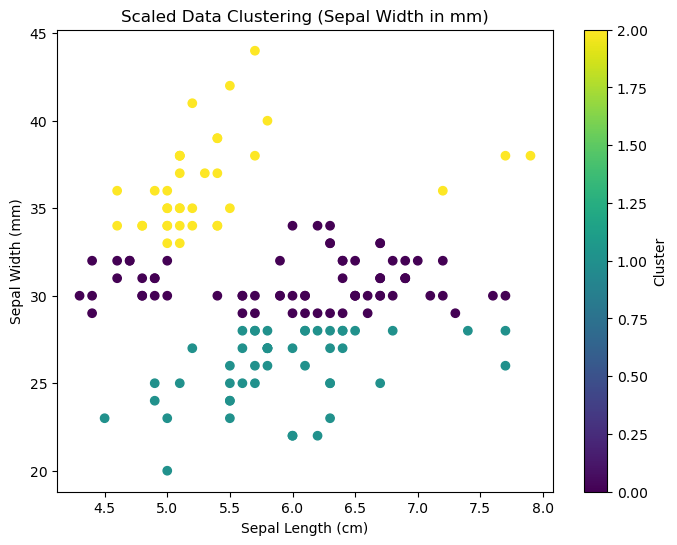

In [6]:
import copy
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset if not already loaded
iris = load_iris()
irisX = iris.data

# 1. Make a copy and scale the second feature (convert from cm to mm)
irisXscaled = copy.deepcopy(irisX)
irisXscaled[:, 1:2] *= 10  # Multiply the second column by 10
print("Original data (first 3 rows):")
print(irisX[:3])
print("\nScaled data (first 3 rows):")
print(irisXscaled[:3])

# 2. Create kmeans object and run clustering on the scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled.fit(irisXscaled)
labels_scaled = kmeans_scaled.labels_
centers_scaled = kmeans_scaled.cluster_centers_

# 3. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(irisXscaled[:, 0], irisXscaled[:, 1], c=labels_scaled, cmap='viridis')
plt.title('Scaled Data Clustering (Sepal Width in mm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (mm)')
plt.colorbar(label='Cluster')
plt.show()

Original data (first 3 rows):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Normalized data (first 3 rows):
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]]


c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


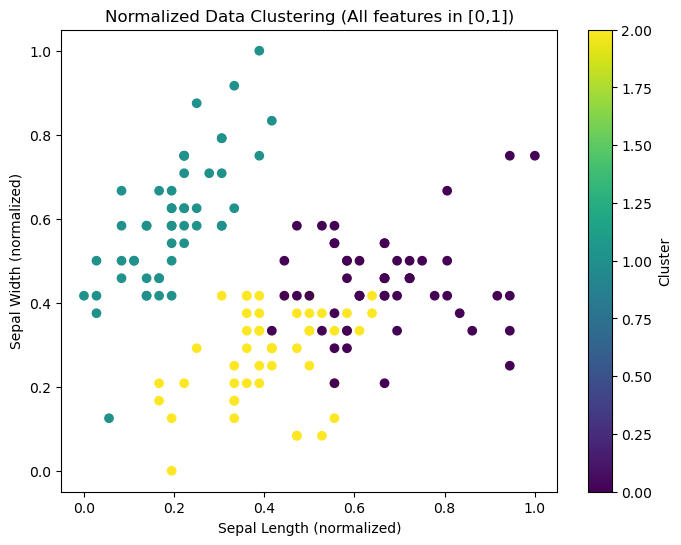

In [7]:
import copy, sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset if not already loaded
iris = load_iris()
irisX = iris.data

# 1. Normalize the data using MinMaxScaler as specified in the instructions
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(irisX)
irisXnormalised = scaler.transform(irisX)
print("Original data (first 3 rows):")
print(irisX[:3])
print("\nNormalized data (first 3 rows):")
print(irisXnormalised[:3])

# 2. Create kmeans object and run clustering on the normalized data
kmeans_normalised = KMeans(n_clusters=3, random_state=42)
kmeans_normalised.fit(irisXnormalised)
labels_normalised = kmeans_normalised.labels_
centers_normalised = kmeans_normalised.cluster_centers_

# 3. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(irisXnormalised[:, 0], irisXnormalised[:, 1], c=labels_normalised, cmap='viridis')
plt.title('Normalized Data Clustering (All features in [0,1])')
plt.xlabel('Sepal Length (normalized)')
plt.ylabel('Sepal Width (normalized)')
plt.colorbar(label='Cluster')
plt.show()

**Decide for yourself which of the three sets of visualisation is clearer**  
Having filled in and run the cell above,  run the cell below and answer the questions to check your understanding

In [ ]:
import workbook5_mcq
from IPython.display import display
display(workbook5_mcq.Q5)
display(workbook5_mcq.Q6)